In [1]:
import pandas as pd
train = pd.read_csv('/kaggle/input/eedi-mining-misconceptions-in-mathematics/train.csv')
train.head(2)


,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0
1,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify,2142.0,143.0,2142.0,NaN


In [35]:
mismap = pd.read_csv('/kaggle/input/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv')
mismap.head(2)

,MisconceptionId,MisconceptionName
0,0,Does not know that angles in a triangle sum to...
1,1,Uses dividing fractions method for multiplying...


In [33]:
test = pd.read_csv('/kaggle/input/eedi-mining-misconceptions-in-mathematics/test.csv')
test.head(2)

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText
0,1869,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets
1,1870,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify


In [2]:
train.columns

Index(['QuestionId', 'ConstructId', 'ConstructName', 'SubjectId',
       'SubjectName', 'CorrectAnswer', 'QuestionText', 'AnswerAText',
       'AnswerBText', 'AnswerCText', 'AnswerDText', 'MisconceptionAId',
       'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId'],
      dtype='object')

In [5]:
train.shape

(1869, 15)

# Top 10 Most Common Subjects

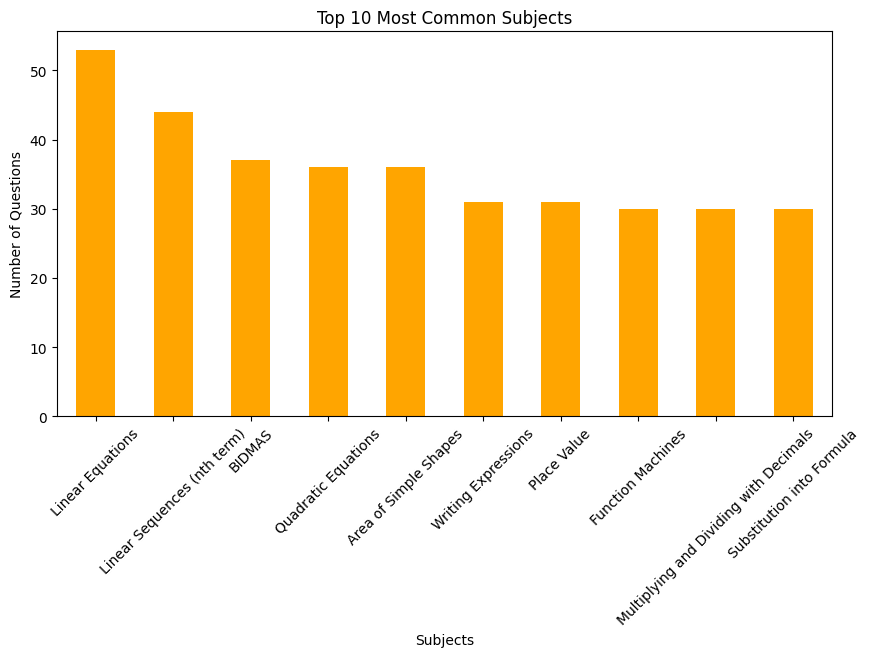

In [21]:
import pandas as pd

# Count subject occurrences
subject_counts = train['SubjectName'].value_counts().head(10)

# Plot
subject_counts.plot(kind='bar', color='orange', figsize=(10,5))
plt.xlabel("Subjects")
plt.ylabel("Number of Questions")
plt.title("Top 10 Most Common Subjects")
plt.xticks(rotation=45)
plt.show()


# Observations

"Linear Equations" is the most common subject, followed by "Linear Sequences (nth term)" and "BIDMAS".

Topics related to algebra and arithmetic dominate the top subjects.

The frequency of topics suggests a focus on foundational math concepts.

# Top 20 Most Common Subject-Construct Pairs

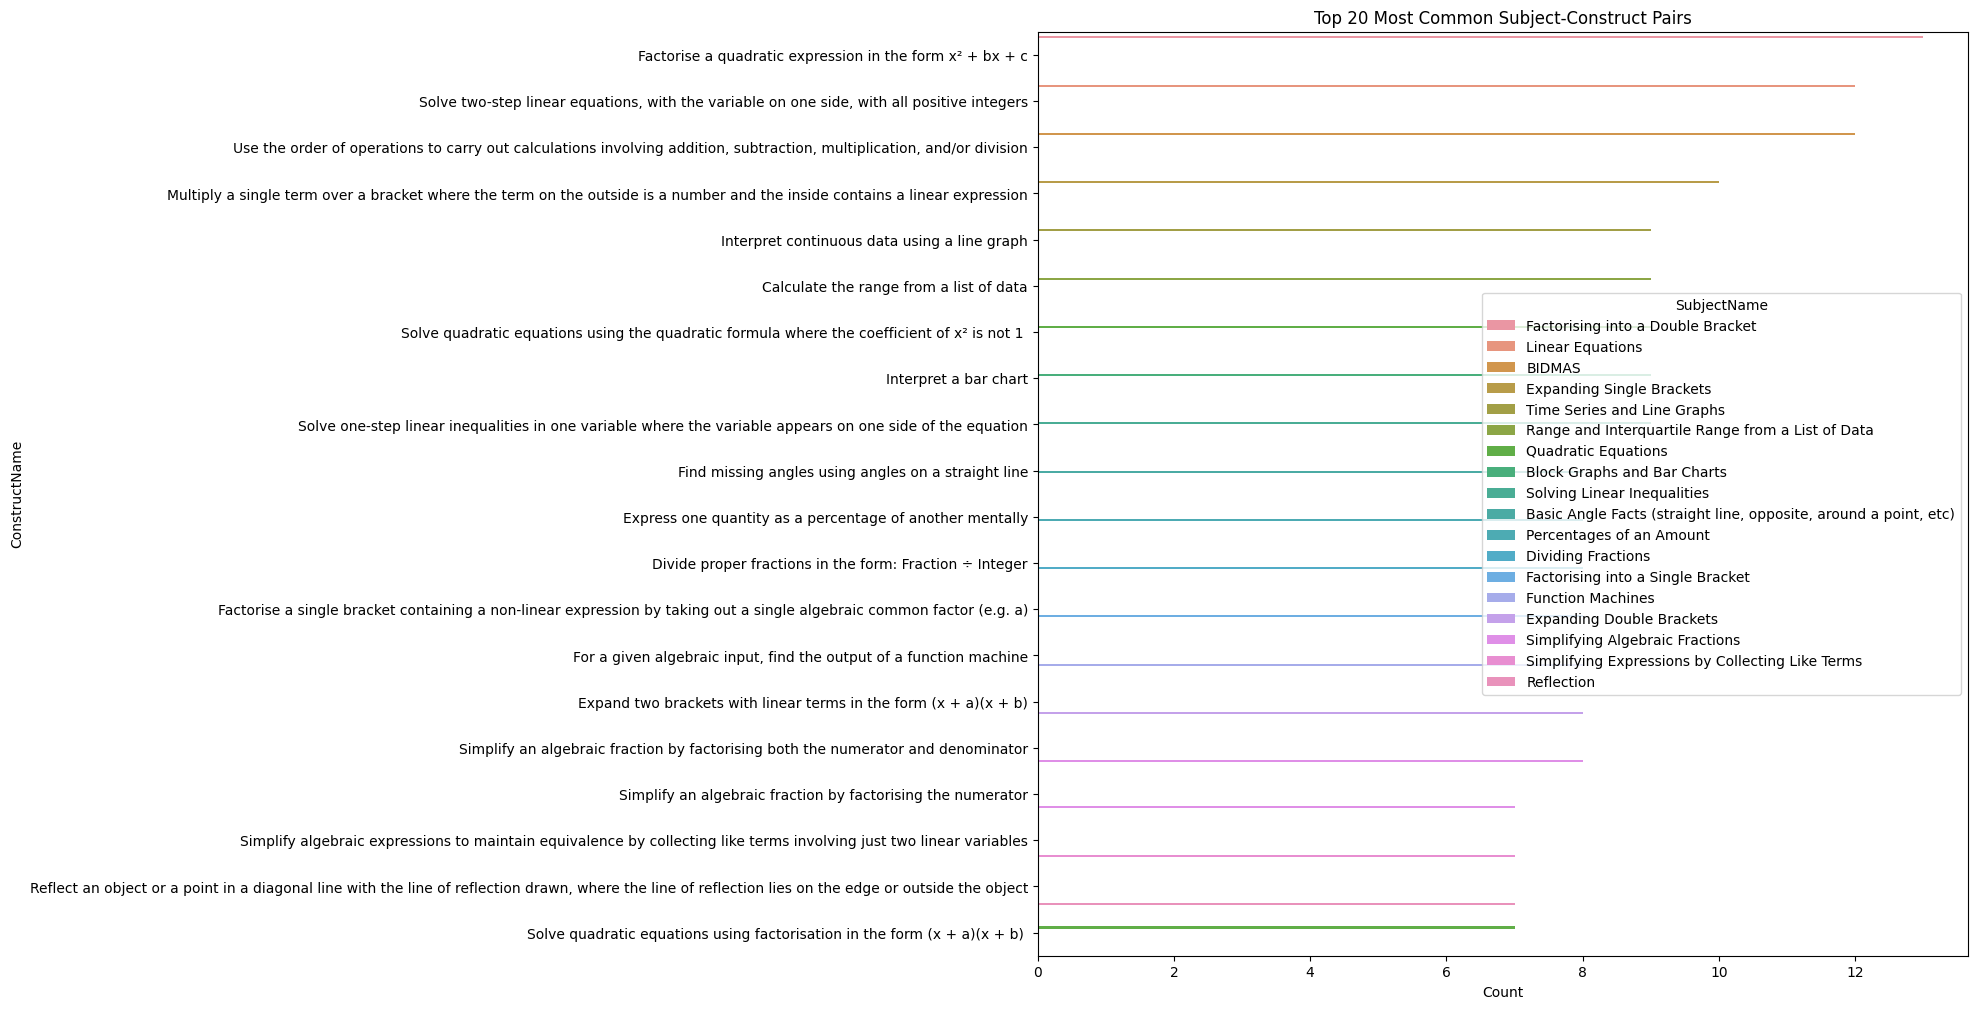

In [27]:
import seaborn as sns

# Group by SubjectName and ConstructName
subject_construct_counts = train.groupby(['SubjectName', 'ConstructName']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12,12))
sns.barplot(data=subject_construct_counts.sort_values(by="Count", ascending=False).head(20),
            x='Count', y='ConstructName', hue='SubjectName')

plt.title("Top 20 Most Common Subject-Construct Pairs")
plt.show()


# Observations:
Factoring quadratic expressions and solving two-step linear equations are among the most common subject-construct pairs.

Several constructs involve interpreting data, such as using bar charts and line graphs.

Expanding brackets, solving inequalities, and simplifying algebraic expressions are also frequent topics.

# Correct Answer Distribution Across Subjects

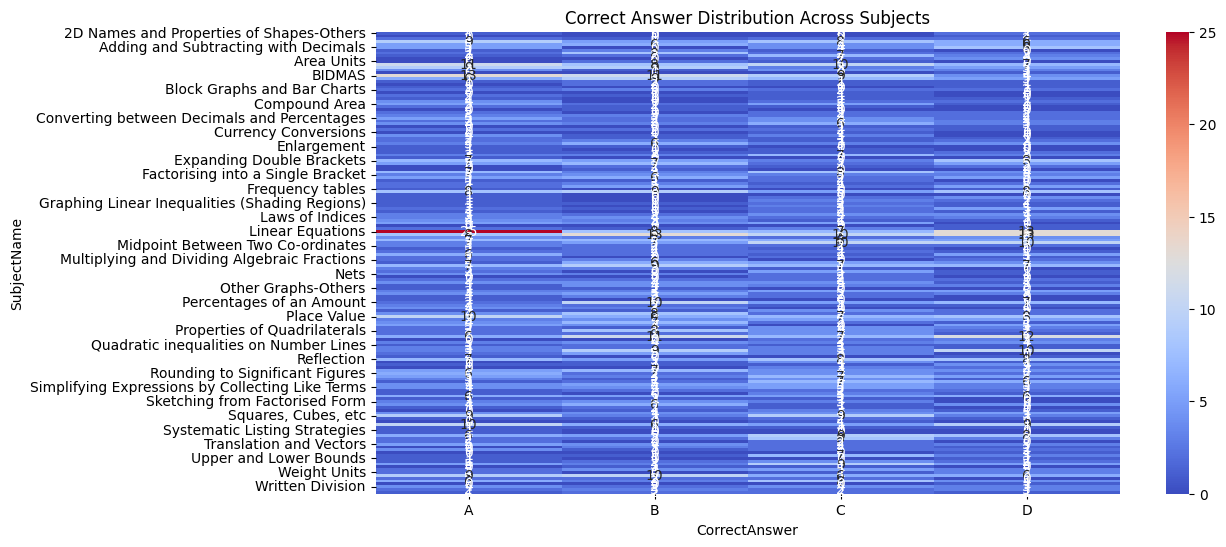

In [28]:
import seaborn as sns

# Create pivot table
heatmap_data = train.pivot_table(index='SubjectName', columns='CorrectAnswer', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm")
plt.title("Correct Answer Distribution Across Subjects")
plt.show()


# Observations

The heatmap shows how correct answers are distributed across different subjects.

Some subjects have more concentrated correct answers in specific choices, which might indicate patterns in question difficulty or test design.

"Linear Equations" appears frequently with correct answers spread across all choices, suggesting it is a fundamental but challenging topic.

# Distribution of Correct Answers (A, B, C, D)

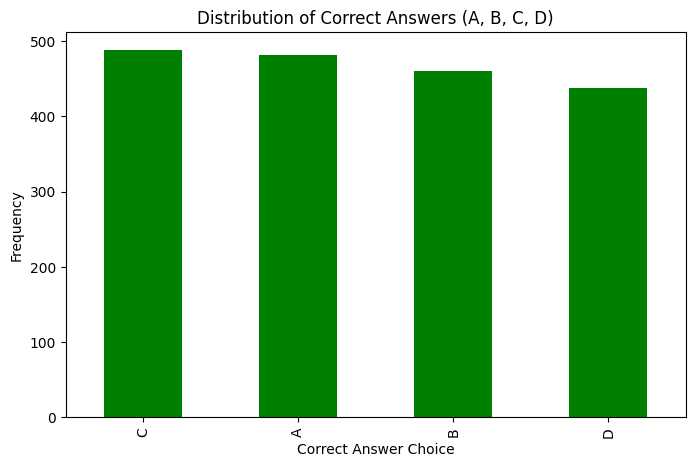

In [20]:
train['CorrectAnswer'].value_counts().plot(kind='bar', color='green', figsize=(8,5))
plt.xlabel("Correct Answer Choice")
plt.ylabel("Frequency")
plt.title("Distribution of Correct Answers (A, B, C, D)")
plt.show()


# Observations:

The correct answers are fairly evenly distributed among the choices (A, B, C, and D).

Option C is the most frequent, followed closely by A.

D appears slightly less frequently, but there is no significant bias in answer choices.

This balance suggests that question formulation does not favor a particular answer choice, indicating good dataset design.

# Most occured word on SubjectName

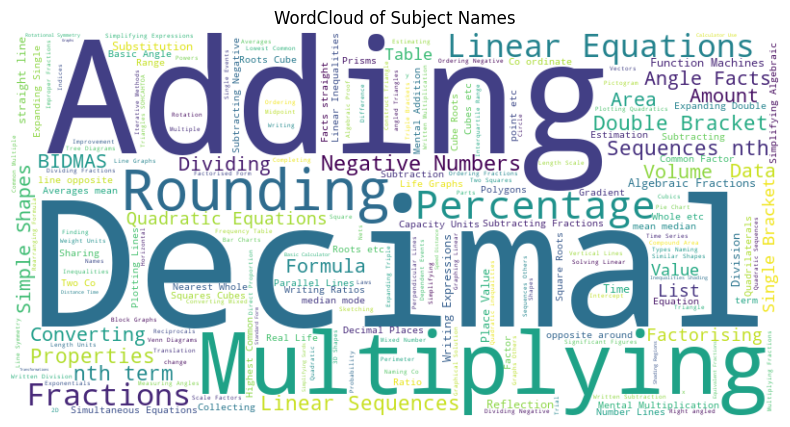

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all subject names into a single string
text = " ".join(train['SubjectName'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.title("WordCloud of Subject Names")
plt.show()


# Observations:


Adding,decimal,multiplying---etc were the most occuring words in subjectname

# Text Length Distribution of Key Features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

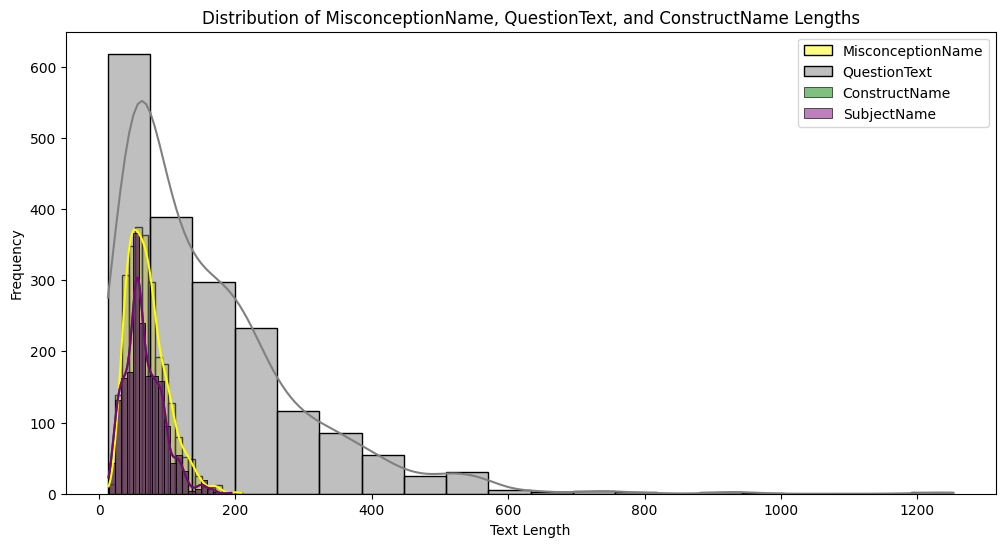

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract lengths
misconception_lengths = [len(i) for i in mismap['MisconceptionName']]
question_lengths = [len(i) for i in train['QuestionText']]
construct_lengths = [len(i) for i in train['ConstructName']]
Subject_lengths= [len(i) for i in train['SubjectName']]

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.histplot(misconception_lengths, bins=20, kde=True, color="yellow", label="MisconceptionName", alpha=0.5)
sns.histplot(question_lengths, bins=20, kde=True, color="gray", label="QuestionText", alpha=0.5)
sns.histplot(construct_lengths, bins=20, kde=True, color="green", label="ConstructName", alpha=0.5)
sns.histplot(construct_lengths, bins=20, kde=True, color="purple", label="SubjectName", alpha=0.5)

# Labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of MisconceptionName, QuestionText, and ConstructName Lengths')
plt.legend()

plt.show()


# Observations:
Most Misconception Names have lengths between 50–100 characters, but a few outliers exceed 200+ characters.

Question Texts are generally longer than misconception names, but their distribution also follows a right-skewed pattern.

Construct Names tend to be the shortest among the three categories.

The right skew in all three distributions indicates that while most entries fall within a moderate range, there exist some extremely long textual descriptions.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


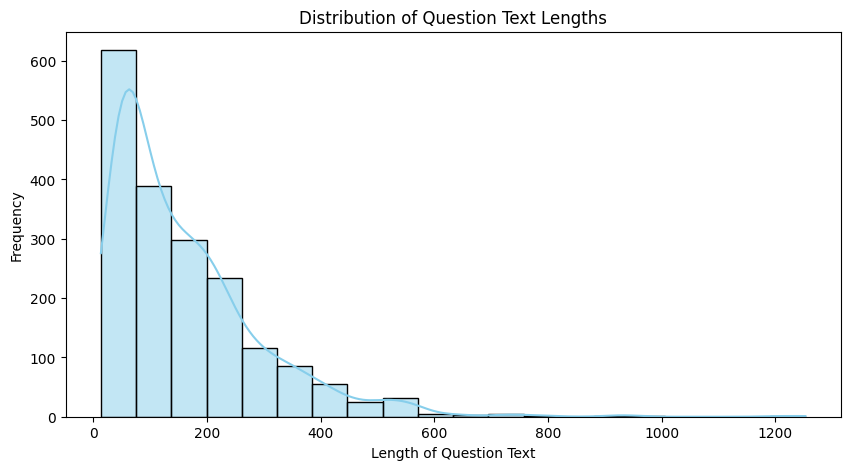

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract misconception name lengths
lengths = [len(i) for i in train['QuestionText']]

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(lengths, bins=20, kde=True, color="skyblue")

# Labels and title
plt.xlabel('Length of Question Text')
plt.ylabel('Frequency')
plt.title('Distribution of Question Text Lengths')

plt.show()


# Top 10 Misconception length 

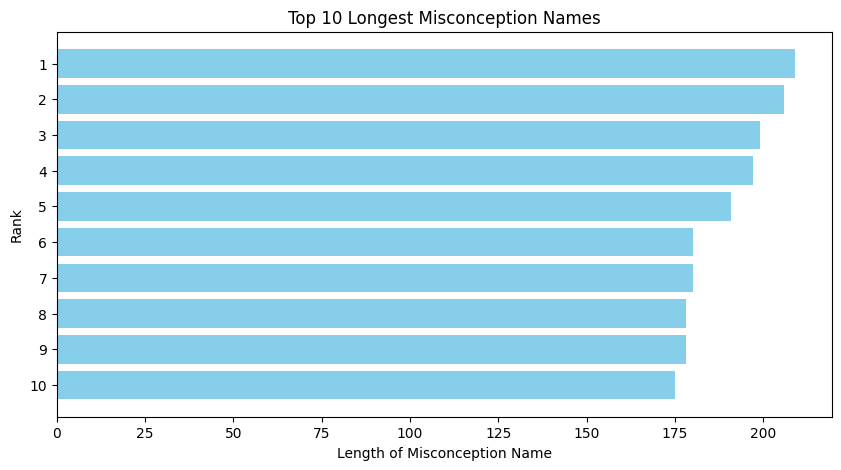

In [6]:
import matplotlib.pyplot as plt

# Create a dictionary to store misconception names and their lengths
len_dict = {i: len(i) for i in mismap['MisconceptionName']}

# Sort by length in descending order and get the top 10
top_10 = sorted(len_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract names and lengths
names, lengths = zip(*top_10)

# Generate numerical indices for the y-axis
y_positions = range(1, len(names) + 1)

# Plot the results
plt.figure(figsize=(10, 5))
plt.barh(y_positions, lengths, color='skyblue')
plt.xlabel('Length of Misconception Name')
plt.ylabel('Rank')
plt.title('Top 10 Longest Misconception Names')
plt.yticks(y_positions, labels=range(1, len(names) + 1))  # Set y-axis labels as 1, 2, 3, ...

plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


# Observation

Maimum length among the top 10 misconception length found is around 209 

# Question Length vs. Correct Answer Choice

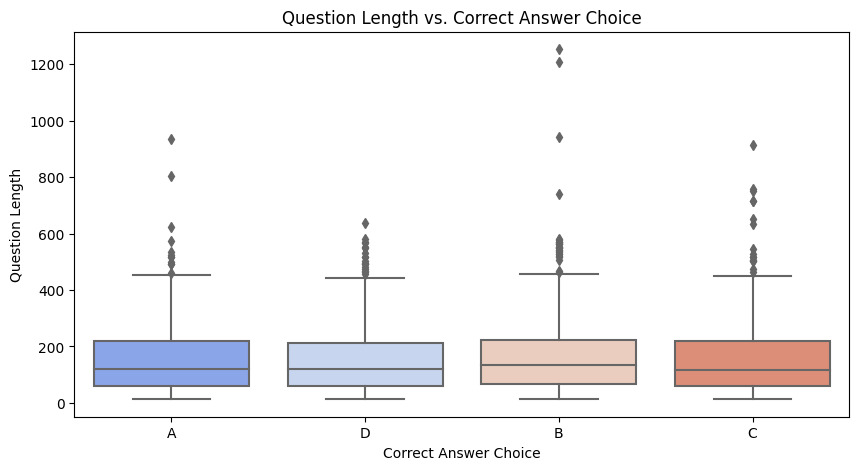

,CorrectAnswer,CorrectAnswerText
0,A,\( 3 \times(2+4)-5 \)
1,D,Does not simplify
2,B,Only\nKatie
3,C,\( 90^{\circ} \)
4,A,\( 30 \)
5,D,\( \mathrm{mm}^{2} \)
6,B,\( \frac{31}{50} \)
7,A,\( 4.32 \)
8,A,\( 7 \)
9,C,Translation by vector\n\(\n\left[\begin{array}...


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure no missing values
train = train.dropna(subset=['CorrectAnswer', 'QuestionText', 'AnswerAText', 'AnswerBText', 'AnswerCText', 'AnswerDText'])

# Compute question lengths
train['QuestionLength'] = train['QuestionText'].apply(len)

# Map the correct answer choice to its respective text
train['CorrectAnswerText'] = train.apply(lambda row: row[f"Answer{row['CorrectAnswer']}Text"], axis=1)

# Boxplot of question length by correct answer choice
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='CorrectAnswer', y='QuestionLength', palette="coolwarm")

plt.title("Question Length vs. Correct Answer Choice")
plt.xlabel("Correct Answer Choice")
plt.ylabel("Question Length")
plt.show()

# Display a sample of correct answer choices with their text
train[['CorrectAnswer', 'CorrectAnswerText']].head(10)


# Observations

Question Length & Difficulty: Longer questions show more outliers, suggesting increased complexity impacts accuracy.

Answer Patterns: Most correct answers are numerical, but some involve expressions or text-based reasoning.

Challenging Topics: Algebraic constructs (e.g., factorization, inequalities) show varied responses, indicating conceptual difficulty.